In [1]:
# Importing libraries and the CSV file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('travel insurance.csv')
print(df.head())

  Name of Agency Type of travel insurance agencies Distribution Channel  \
0            CBH                     Travel Agency              Offline   
1            CBH                     Travel Agency              Offline   
2            CWT                     Travel Agency               Online   
3            CWT                     Travel Agency               Online   
4            CWT                     Travel Agency               Online   

                      Product Name Claim Status  Duration of travel  \
0               Comprehensive Plan           No                 186   
1               Comprehensive Plan           No                 186   
2  Rental Vehicle Excess Insurance           No                  65   
3  Rental Vehicle Excess Insurance           No                  60   
4  Rental Vehicle Excess Insurance           No                  79   

  Destination of travel  Amount of sales  Commision (in value) Gender  Age  
0              MALAYSIA            -29.0     

In [2]:
# Looking at data types

print(df.dtypes)

Name of Agency                        object
Type of travel insurance agencies     object
Distribution Channel                  object
Product Name                          object
Claim Status                          object
Duration of travel                     int64
Destination of travel                 object
Amount of sales                      float64
Commision (in value)                 float64
Gender                                object
Age                                    int64
dtype: object


In [3]:
# Looking at the size and the description of the dataframe. Some values can't be negative, we will drop them

print(df.shape)
df.describe()

(63326, 11)


,Duration of travel,Amount of sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [4]:
# Checking number of negative values in numeric columns

data = df.drop(['Name of Agency', 'Type of travel insurance agencies', 'Distribution Channel', 'Product Name', 'Claim Status', 'Destination of travel', 'Gender'], axis=1)
data.lt(0).sum()

Duration of travel        5
Amount of sales         678
Commision (in value)      0
Age                       0
dtype: int64

In [5]:
# We can drop those rows

df = df[df['Duration of travel'] > 0]
df = df[df['Amount of sales'] > 0]

print(df.shape)

data = df.drop(['Name of Agency', 'Type of travel insurance agencies', 'Distribution Channel', 'Product Name', 'Claim Status', 'Destination of travel', 'Gender'], axis=1)
data.lt(0).sum()

(60700, 11)


Duration of travel      0
Amount of sales         0
Commision (in value)    0
Age                     0
dtype: int64

In [6]:
df.describe()

,Duration of travel,Amount of sales,Commision (in value),Age
count,60700.000000,60700.000000,60700.000000,60700.000000
mean,48.993526,43.118010,9.345574,39.946046
std,102.791292,47.801908,19.477491,13.928584
min,1.000000,0.070000,0.000000,0.000000
25%,9.000000,19.800000,0.000000,35.000000
50%,22.000000,28.000000,0.000000,36.000000
75%,52.000000,49.500000,10.500000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [7]:
# Checking for NULL values

print(df.isnull().sum())

Name of Agency                           0
Type of travel insurance agencies        0
Distribution Channel                     0
Product Name                             0
Claim Status                             0
Duration of travel                       0
Destination of travel                    0
Amount of sales                          0
Commision (in value)                     0
Gender                               42950
Age                                      0
dtype: int64


In [8]:
# There are too many missing values in 'Gender' column. We will need to drop it

df = df.drop('Gender', axis=1)
print(df.shape)

(60700, 10)


In [9]:
# There are no more NULL values

print(df.isnull().sum())

Name of Agency                       0
Type of travel insurance agencies    0
Distribution Channel                 0
Product Name                         0
Claim Status                         0
Duration of travel                   0
Destination of travel                0
Amount of sales                      0
Commision (in value)                 0
Age                                  0
dtype: int64


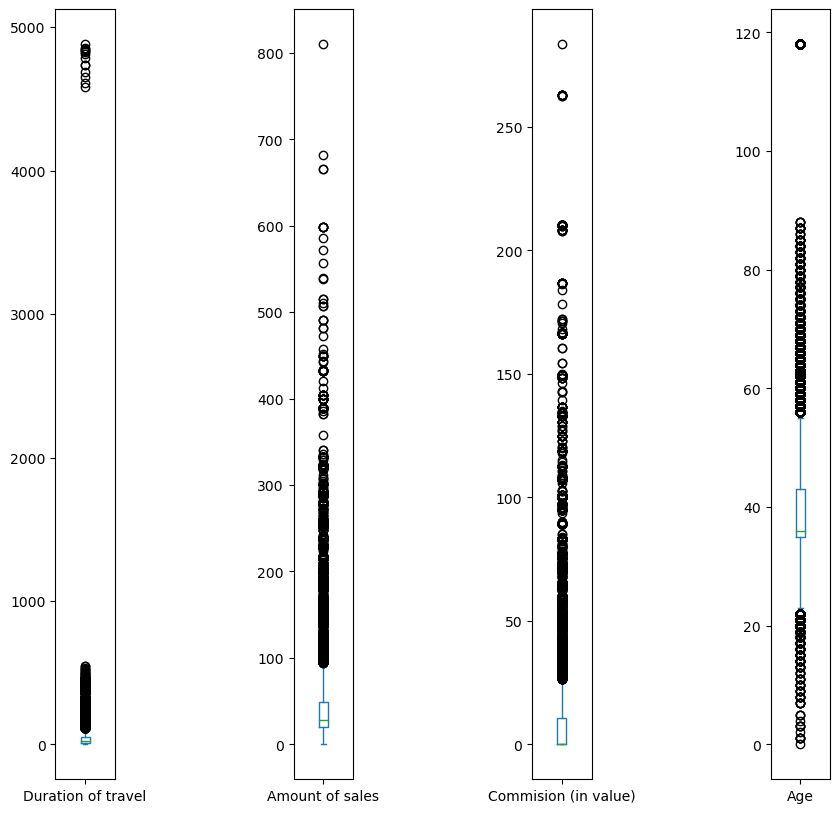

In [10]:
# Making box plots for each column

df.plot(
    kind='box',
    subplots= True,
    sharey= False,
    figsize=(10,10)
)
plt.subplots_adjust(wspace=3)
plt.show()

In [11]:
# Manually dropping extreme outliers in column 'Duration of travel'

df = df[df['Duration of travel'] < 1000]
print(df.shape)

(60686, 10)


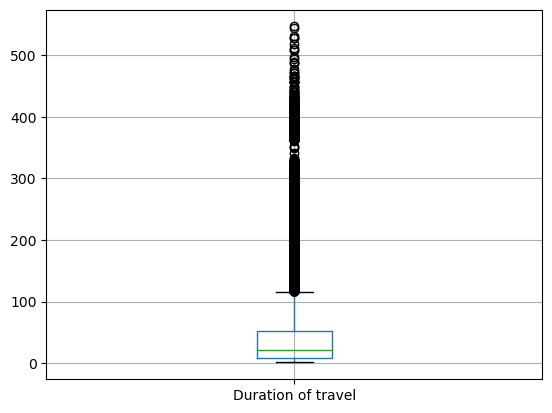

In [12]:
# Looking at changes

b_plot = df.boxplot(column = 'Duration of travel')

<AxesSubplot:>

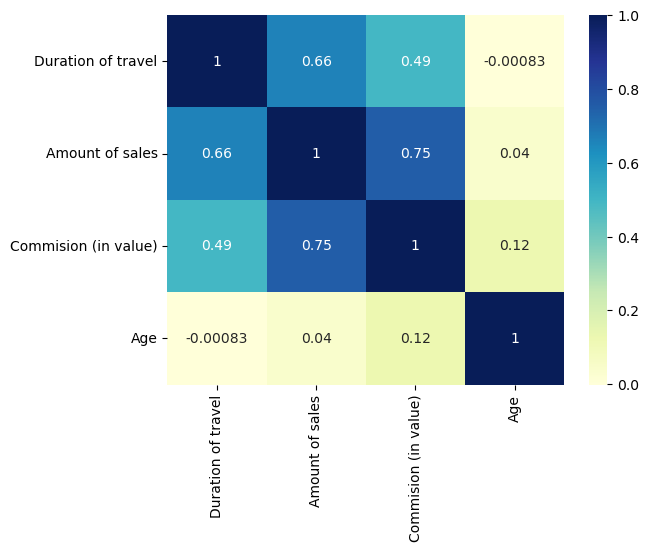

In [13]:
# Creating heatmap to look at corralation.
#'Amount of sales' has strong positive corralation with 'Commision (in value)' and 'Duration of travel'

sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True )

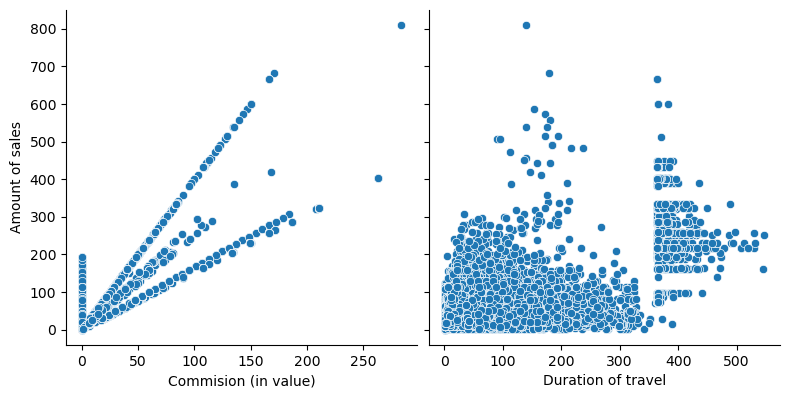

In [14]:
# Creating scatterplot to look at the corralation

sns.pairplot(df, x_vars=['Commision (in value)', 'Duration of travel'], y_vars = 'Amount of sales', height = 4, kind = 'scatter')

In [98]:
# making separate dataframe for categorical values

df_c = df.select_dtypes(object)
df_c.head()

,Name of Agency,Type of travel insurance agencies,Distribution Channel,Product Name,Claim Status,Destination of travel
21,C2B,Airlines,Online,Bronze Plan,No,SINGAPORE
22,C2B,Airlines,Online,Bronze Plan,No,SINGAPORE
23,C2B,Airlines,Online,Bronze Plan,Yes,SINGAPORE
24,C2B,Airlines,Online,Silver Plan,No,SINGAPORE
25,C2B,Airlines,Online,Annual Silver Plan,No,SINGAPORE


In [99]:
df_c.nunique()

Name of Agency                        16
Type of travel insurance agencies      2
Distribution Channel                   2
Product Name                          25
Claim Status                           2
Destination of travel                147
dtype: int64

In [100]:
# using the get_dummies function

df1 = pd.get_dummies(df_c, drop_first=True)
df_c = pd.concat([df1, df_c], axis=1)

In [101]:
# dropping old columns

df_c = df_c.drop(['Name of Agency', 'Type of travel insurance agencies', 'Distribution Channel', 'Product Name', 'Claim Status', 'Destination of travel'], axis=1)
df_c.head()

,Name of Agency_ART,Name of Agency_C2B,Name of Agency_CBH,Name of Agency_CCR,Name of Agency_CSR,Name of Agency_CWT,Name of Agency_EPX,Name of Agency_JWT,Name of Agency_JZI,Name of Agency_KML,...,Destination of travel_UNITED KINGDOM,Destination of travel_UNITED STATES,Destination of travel_URUGUAY,Destination of travel_UZBEKISTAN,Destination of travel_VANUATU,Destination of travel_VENEZUELA,Destination of travel_VIET NAM,"Destination of travel_VIRGIN ISLANDS, U.S.",Destination of travel_ZAMBIA,Destination of travel_ZIMBABWE
21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
